<h1>Kapitel 13 Mer om Regressionsanalys</h1>

In [1]:
#importera paket och exempeldata 
import numpy as np
import pandas as pd
import scipy.stats as scs 

import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels.api as sm
from statsmodels.formula.api import ols

# importera palmer penguins
filepath = '../Data/penguins.csv'
penguins = pd.read_csv(filepath)
penguins = penguins.dropna().reset_index() # Plocka bort rader som innehåller NaN

In [2]:
penguins = penguins.sample(30)
penguins.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
303,314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008
62,68,Adelie,Torgersen,35.9,16.6,190.0,3050.0,female,2008
315,326,Chinstrap,Dream,48.1,16.4,199.0,3325.0,female,2009
52,58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008
190,197,Gentoo,Biscoe,43.6,13.9,217.0,4900.0,female,2008


<h3>Korrelationstest med scipy.stats</h3>

In [3]:
r, p = scs.pearsonr(penguins['flipper_length_mm'], penguins['body_mass_g'])
r, p

(0.843082047520074, 5.011192080512042e-09)

<h3>Konfidensintervall och hypotestest för koefficienterna i regressionsmodellen</h3>

In [4]:
model = ols('flipper_length_mm ~ body_mass_g', data=penguins).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     68.81
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           5.01e-09
Time:                        10:25:47   Log-Likelihood:                -102.69
No. Observations:                  30   AIC:                             209.4
Df Residuals:                      28   BIC:                             212.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     139.3056      7.347     18.961      

<h3>Prediktionsintervall in sample-prediktion</h3>

In [5]:
predictions = model.get_prediction(penguins['body_mass_g'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,163.201659,196.565853
1,168.784445,201.503331
2,173.102114,205.451583
3,165.606003,198.670194
4,196.597085,229.297797
5,174.268821,206.539218
6,173.102114,205.451583
7,184.927600,216.920966
8,192.283938,224.593575
9,196.953202,229.693128


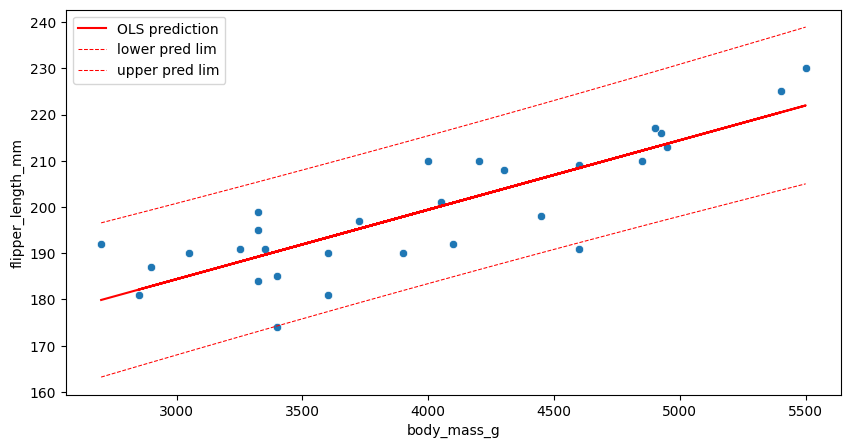

In [6]:
order = np.argsort(penguins['body_mass_g'])
xs = np.array(penguins['body_mass_g'])[order]
# ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

order = np.argsort(penguins['body_mass_g'])
x = np.array(penguins['body_mass_g'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

<h3>Prediktionsintervall out of sample-prediktion</h3>

      body_mass_g
0        0.000000
1      151.057402
2      302.114804
3      453.172205
4      604.229607
..            ...
327  49395.770393
328  49546.827795
329  49697.885196
330  49848.942598
331  50000.000000

[332 rows x 1 columns]


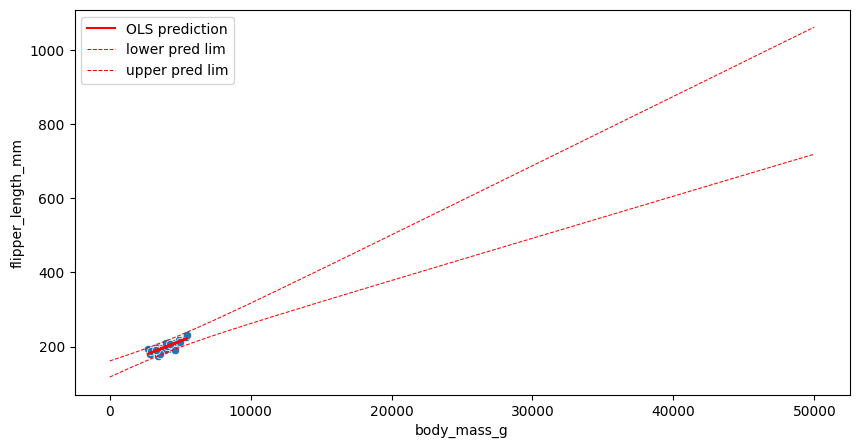

In [7]:
xs = pd.DataFrame(np.linspace(0,50000,332), columns=['body_mass_g'])
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)

ax.legend(loc="best")
plt.show()